In [1]:
import pandas as pd
import numpy as np
import os
import re
import nltk
import pickle
#from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords, words
from sklearn.model_selection import train_test_split
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SRAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SRAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SRAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaed = files.upload()

Saving formspring_data.csv to formspring_data.csv


In [3]:
data=pd.read_csv(r'C:\Users\SRAVAN\Desktop\FINAL CODE\formspring_data.csv',error_bad_lines=False,sep='\t')
data.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [4]:
data.shape

(12773, 14)

In [5]:
df=data[data.ans1.notna()]
df.shape

(12731, 14)

In [6]:
df1=df[(df.ans1==df.ans2)& (df.ans2 == df.ans3) & (df.ans1 == df.ans3)].reset_index(drop=True)
print(df1.shape)
df1.head()

(11089, 14)


,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what&#039;s your favorite song? :D<br>,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,<3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,&quot;hey angel you duh sexy&quot;,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,(:,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,******************MEOWWW*************************,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [7]:
df1['ques']=df['ques'].apply(lambda x:re.sub('[^a-zA-Z\s0-9]','',x) if isinstance(x,str) else ' ')
df1.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what039s your favorite song Dbr,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,3,</3 ? haha jk! <33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,quothey angel you duh sexyquot,Really?!?! Thanks?! haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,,;(,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,MEOWWW,*RAWR*?,None,No,0,NaN,No,0,NaN,No,0,NaN


In [8]:
df1['ans']=df['ans'].apply(lambda x:re.sub('[^a-zA-Z\s0-9]','',x) if isinstance(x,str) else ' ')
df1.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what039s your favorite song Dbr,I like too many songs to have a favorite,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,3,3 haha jk 33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,quothey angel you duh sexyquot,Really Thanks haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,,,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,MEOWWW,RAWR,None,No,0,NaN,No,0,NaN,No,0,NaN


In [9]:
stemmmer=SnowballStemmer('english')
df1['ques']=df1['ques'].apply(lambda x:' '.join([stemmmer.stem(i) for i in x.split(' ')]) if isinstance(x,str) else x)
df1['ans']=df1['ans'].apply(lambda x:' '.join([stemmmer.stem(i) for i in x.split(' ')]) if isinstance(x,str) else x)

In [11]:
df1.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what039 your favorit song dbr,i like too mani song to have a favorit,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,3,3 haha jk 33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,quothey angel you duh sexyquot,realli thank haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,,,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,meowww,rawr,None,No,0,NaN,No,0,NaN,No,0,NaN


In [12]:
#stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
df1['ques']=df1['ques'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split(' ') ]) if isinstance(x,str) else x)
df1['ans']=df1['ans'].apply(lambda x:' '.join([lemmatizer.lemmatize(i) for i in x.split(' ') ]) if isinstance(x,str) else x)

In [13]:
df1.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what039 your favorit song dbr,i like too mani song to have a favorit,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,3,3 haha jk 33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,quothey angel you duh sexyquot,realli thank haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,,,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,meowww,rawr,None,No,0,NaN,No,0,NaN,No,0,NaN


In [14]:
stop_words = stopwords.words("english")
df1['ques']=df1['ques'].apply(lambda x:' '.join([i for i in x.split(' ') if i not in stop_words] ) if isinstance(x,str) else x)
df1['ans']=df1['ans'].apply(lambda x:' '.join([i for i in x.split(' ') if i not in stop_words]) if isinstance(x,str) else x)

In [15]:
df1.head()

,userid,post,ques,ans,asker,ans1,severity1,bully1,ans2,severity2,bully2,ans3,severity3,bully3
0,aguitarplayer94,Q: what&#039;s your favorite song? :D<br>A: I ...,what039 favorit song dbr,like mani song favorit,None,No,0,NaN,No,0,NaN,No,0,NaN
1,aprilpooh15,Q: <3<br>A: </3 ? haha jk! <33,3,3 haha jk 33,None,No,0,NaN,No,0,NaN,No,0,NaN
2,aprilpooh15,Q: &quot;hey angel you duh sexy&quot;<br>A: R...,quothey angel duh sexyquot,realli thank haha,None,No,0,NaN,No,0,NaN,No,0,NaN
3,aprilpooh15,Q: (:<br>A: ;(,,,None,No,0,NaN,No,0,NaN,No,0,NaN
4,aprilpooh15,Q: ******************MEOWWW*******************...,meowww,rawr,None,No,0,NaN,No,0,NaN,No,0,NaN


In [16]:
ans=df1[df1.ans.notna()].ans

In [17]:
ans2=df1[df1.ans.notna()]
Ans=ans2[ans2.ans1=='Yes']
Ans['ans'].values

array([' atm rue 21d forever21 3', ' hey  yah momma',
       ' hahaha wht u tlkn bout girl',
       ' yumm justin bieber pdiddi son jdoir yummmhaha realli celeb bhut yeah ampamp chan fckn tatumhaha oh damn',
       ' hmmmm think part te guy support sing tht part make tear la bohem good one two',
       ' umm bunch peopl join  got bore  want', ' im wear', ' yes ',
       ' aww thanks yuu',
       ' ahhaha yuurr funnyy reall funni ndd dntt want hatt guy come bckk mee anyyi moreendd yeahh suck tlking shiti jstt dntt tlk shitt thiss wouldd tlk itt yuurr face iff knew whoo thiss wassbitch gett life ndd stopp worri aboutt mine',
       ' pirateesss ', ' watt yuu meann', ' ahaha readyy h', ' uhmmm ',
       ' lemenadee', ' ummmahhh hottt seniorrr',
       ' welll forr righhtt noww one', ' uhm ', ' ahahaha noo',
       ' ahaha thank', '  ',
       ' didnt say mental put becaus peopl dont mean duh comeback suck',
       ' bitch aint fake', ' noth realli', ' pepe', ' im fake ',
       ' chicken 

In [18]:
bully=df1[df1.ans.notna()].ans1

In [19]:
data = df = pd.DataFrame(list(zip(ans, bully)),
               columns =['text', 'label'])

In [20]:
data.head(5)

,text,label
0,like mani song favorit,No
1,3 haha jk 33,No
2,realli thank haha,No
3,,No
4,rawr,No


In [21]:
data.label.value_counts()

No     10710
Yes      339
Name: label, dtype: int64

In [22]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data['label']== 'No']
df_minority = data[data['label']== 'Yes']
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=5000,random_state=123) 
df_majority_downsampled = resample(df_majority, replace=False,n_samples=5000,random_state=123) 
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority_downsampled])
 
# Display new class counts
df_upsampled['label'].value_counts()

Yes    5000
No     5000
Name: label, dtype: int64

In [23]:
 # shuffle the DataFrame rows 
data= df_upsampled.sample(frac = 1)

C:\Users\SRAVAN\AppData\Local\Temp/ipykernel_6360/1266229457.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df['label'], rotation=60, horizontalalignment= 'right')


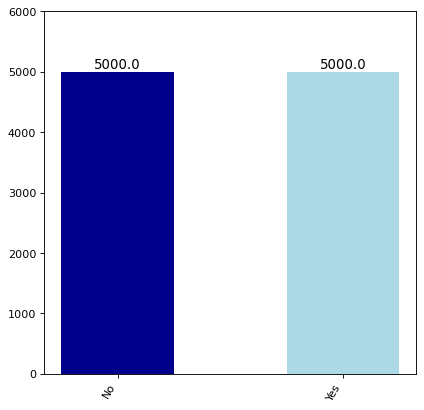

In [24]:
import matplotlib.pyplot as plt
import random
# Prepare Data
df = data.groupby('label').size().reset_index(name='counts')
n = df['label'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(6,6), dpi= 80)
plt.bar(df['label'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['label'], rotation=60, horizontalalignment= 'right')

plt.ylim(0, 6000)
plt.show()

In [25]:
tf_idf=TfidfVectorizer()
tf_idf.fit(data['text'])

X=tf_idf.transform(data['text'])
X.shape

(10000, 6295)

In [26]:
len(data["label"])

10000

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
y = le.fit_transform(data["label"])

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print('No of training samples {}'.format(X_train.shape[0]))
print('No of test samples {}'.format(X_test.shape[0]))

No of training samples 8000
No of test samples 2000


In [29]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=200)

<AxesSubplot:>

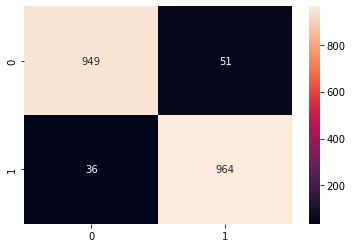

In [30]:
Y_pred_rf=rf.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,Y_pred_rf),annot=True,fmt='d')

In [31]:
print('accuracy rf {}'.format(accuracy_score(Y_test,Y_pred_rf)))

accuracy rf 0.9565


In [32]:
text=' hahaha wht u tlkn bout girl'
loc=np.where(ans.values==text)
X_in=X[loc[0][0]].reshape(1,-1)
X_in.shape

(1, 6295)

In [33]:
Y_pred=rf.predict(X_in)
if Y_pred[0]==0:
  print('No')
else:
  print('Yes')

No


In [34]:
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)


SVC(kernel='linear')

<AxesSubplot:>

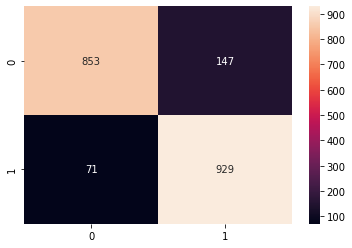

In [35]:
Y_pred_svm=svm.predict(X_test)
sns.heatmap(confusion_matrix(Y_test,Y_pred_svm),annot=True,fmt='d')

In [36]:
print('accuracy svm {}'.format(accuracy_score(Y_test,Y_pred_svm)))

accuracy svm 0.891
